Following Melanie Walsh Reddit tutorial

In [1]:
import sys
import csv
import requests
import re
from bs4 import BeautifulSoup
!pip install psaw

In [2]:
import pandas as pd
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 50)

In [3]:
from psaw import PushshiftAPI

# Initialize PushShift
api = PushshiftAPI()

In [4]:
api_request_generator = api.search_submissions(subreddit='wow',
                                               score = ">2000")

In [5]:
wow_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

C:\Users\Lazza\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [6]:
wow_submissions.shape

(3198, 97)

In [7]:
wow_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_is_blocked', 'author_patreon_flair', 'author_premium',
       'awarders', 'can_mod_post', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gilded', 'gildings', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'post_hint',
       'preview', 'pwls', 'retrieved_on', 'score'

In [8]:
wow_submissions[['title', 'score']].sample(10)

,title,score
2905,"Draenor's Moon, it spins!",2022
898,Oh DBM....You sly dogs...,5682
250,SMH,2667
774,"""And as for ""this conversation should have happened during beta,"" you're right. It should have. I'm sorry it didn't.""",3733
2028,me irl,3473
1527,Productivity.,3157
593,When they tell you you have to work with the Horde again,5039
1467,Over at r/AskReddit,6710
2778,What Warcraft 1's map might look like in WoW,2251
3013,TIL people don't like monks,3324


In [9]:
wow_submissions['date'] = pd.to_datetime(wow_submissions['created_utc'], utc=True, unit='s')

In [10]:
wow_submissions[['author', 'date', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']]

,author,date,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,shabadabadabada,2021-10-05 15:59:50+00:00,Great Work,,https://i.redd.it/n2blkk3jmnr71.png,wow,2739,1321,0.0
1,akaval,2021-10-05 09:11:08+00:00,Suggestive Player Character Joke and Flirt Voice Lines Removed in Patch 9.1.5,,https://www.wowhead.com/news/suggestive-player-character-joke-and-flirt-voice-lines-removed-in-patch-9-1-5-324416,wow,2474,3935,0.0
2,Bluffy_Disaster,2021-08-20 13:08:30+00:00,Getting legendary powers from Sire Denathrius is not very alt friendly.,,https://i.redd.it/z5gz1ur1iii71.png,wow,2522,1026,0.0
3,DSjaha,2021-06-16 14:21:17+00:00,Flash concentration go brrrr,,https://v.redd.it/r9y2ihjizm571,wow,2356,504,0.0
4,Flappycunt,2021-06-15 18:14:43+00:00,Jaina should've been voiced by JK Simmons,,https://i.redd.it/rprzobkpzg571.png,wow,3118,305,0.0
...,...,...,...,...,...,...,...,...,...
3193,Hadrron,2012-11-18 01:11:18+00:00,My go on the then/now screenshot thing. This one is \nsad. Way too sad.,,http://i.imgur.com/PRMeh.jpg,wow,2203,425,NaN
3194,pastisset,2012-11-01 15:52:16+00:00,My friend's wedding proposal,,http://imgur.com/a/Lmdm8#0,wow,2423,157,NaN
3195,Weison,2012-10-25 12:13:11+00:00,Oppa Warcraft Style,,http://imgur.com/sbTLV,wow,2041,97,NaN
3196,cerlynn,2012-10-14 16:14:02+00:00,Dedication.,,http://i.imgur.com/Z2qWx.jpg,wow,2917,158,NaN


Creating a Visualisation myself

Comparing the Reddit score to the amount of comments left on the post

In [11]:
print(wow_submissions[['score', 'num_comments']].nlargest(5, ['score', 'num_comments']))
to_plot = wow_submissions[['score', 'num_comments']].nlargest(5, ['score', 'num_comments'])

      score  num_comments
251   59409          2210
1900  53491         10476
472   30418          1260
1690  29083          1928
785   26636          1222


<AxesSubplot:>

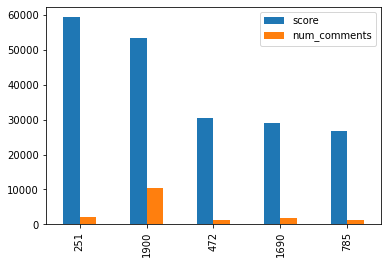

In [12]:
to_plot.plot(kind='bar')